<b>Imports</b>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('insurance.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<b>1. Exploratory Data Analysis (EDA)<b/>

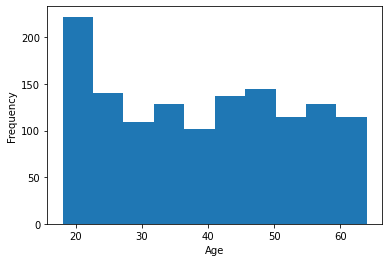

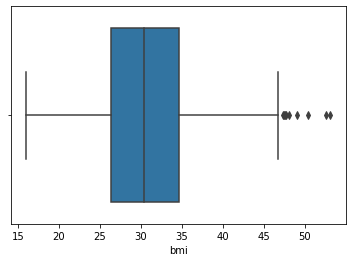

In [10]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=data['bmi'])
plt.show()

We can conclude that most of the population in our data is about 20 years old and the rest of age ranges are equlay distributed</br>
Also we can say that BMI of the 50% of the sample is between 25 and 35

In [21]:
grouped = df.groupby('sex')['bmi'].mean()

In [19]:
grouped

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [29]:
print(df[df['sex'] == 'male']['bmi'].mode())
print(df[df['sex'] == 'female']['bmi'].mode())


0    32.3
Name: bmi, dtype: float64
0    29.92
Name: bmi, dtype: float64


Analysing the BMI by sex from the point of view of the mean there is almost no difference. But if we look by the mode we can sea that MALE are more prone to a higher BMI

<b>2. Data Preprocessing</b>

In [33]:
df_copy = df.copy(deep=True)

In [35]:
num_cols = ['age', 'bmi', 'children', 'charges']

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [36]:
data_normalized = df.copy()
data_normalized[num_cols] = scaler_minmax.fit_transform(data[num_cols])

data_standardized = df.copy()
data_standardized[num_cols] = scaler_standard.fit_transform(data[num_cols])

In [45]:
#data_normalized

In [46]:
categorical_cols = ['sex', 'smoker', 'region']

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

df_encoded = pd.concat([data_standardized, encoded_df], axis=1)

In [48]:
df_encoded.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [49]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,-0.961596,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,-0.930362,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<b>3. Feature Exploration</b>

In [52]:
mapping = {'yes': 1, 'no': 0}
df['smoker_1_0'] = df['smoker'].map(mapping)
#df

,age,sex,bmi,children,smoker,region,charges,smoker_1_0
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


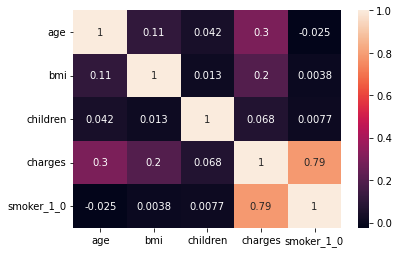

In [53]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

It may be concluded that exist certain correlation between age and bmi with charges. And exists a strong correlation between smoking and medical charges.

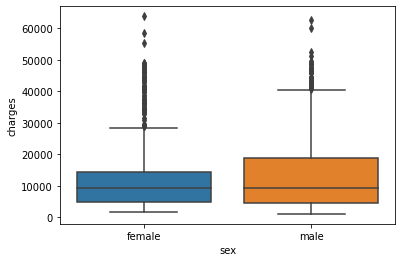

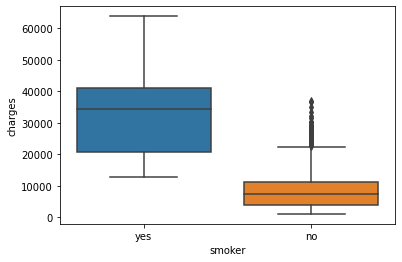

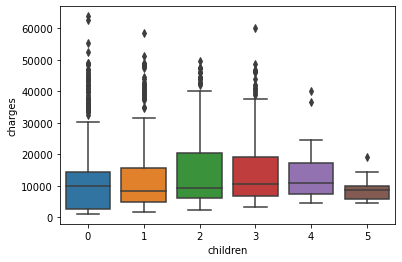

In [58]:
sns.boxplot(x='sex', y='charges', data=data)
plt.show()

sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

sns.boxplot(x='children', y='charges', data=data)
plt.show()

According the gender it can be concluded that money spended as medical cost is pretty similar but we can see that the 50% above the median of the Males duplicates  50% above the median of the Females</br>
Pretty clear to see that smoker people have higher charges as medical cost</br>
And doesnt exist a correlation between number of childrens and charges

In [70]:
def bins_bmi(bmi):
    if bmi < 20:
        return '15-20'
    elif bmi < 25:
        return '20-25'
    elif bmi < 30:
        return '25-30'
    elif bmi < 35:
        return '30-35'
    elif bmi < 40:
        return '35-40'
    elif bmi < 45:
        return '40-45'
    elif bmi < 50:
        return '45-50'
    elif bmi < 55:
        return '50-55'
        
df['bmi_bins'] = df['bmi'].apply(bins_bmi)

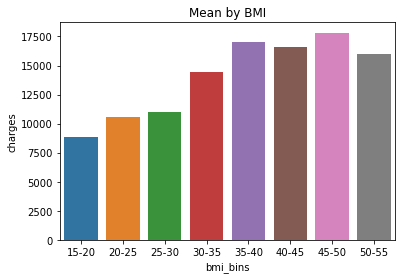

In [73]:
grouped = df.groupby('bmi_bins')['charges'].mean().reset_index()

sns.barplot(x='bmi_bins', y='charges', data=grouped)
plt.title('Mean by BMI')
plt.show()

We can see that with a bmi of 30 or more, which is considered as obesity by the WHO, expenses increase at 50% about.